# Introduction to Julia

* Julia is a high-level programming language for technical computing which allows you to manipulate and analyse large data sets

## Interesting features:
 * Julia is build from the ground for techical computing. 
 * The language is close to the mathematical notation, for example to define a function $f(x) = 2x + 3$ in Julia is:

```julia
f(x) = 2x + 3
```
  
 * Julia is free and open-source software.
 * Julia's code is compiled to machine code and loops can be as fast as in other compiled languages (like Fortran or C)


## Instructions for installing Julia on your laptop

* If you want to install Julia on your laptop later on, here are some instructions
* Go to http://julialang.org/downloads/
* There are various editor with support for Julia (like atom, notepad++, emacs, vim...)

### Ways to run Julia:

#### Command line

* Use the `Tab` key to complete file, variable and function names
* `Up` and `down arrows` key to repeat a previously entered command
* `Control-R` to search a command
* On Windows enable "[quick edit](https://www.tekrevue.com/tip/boost-productivity-quickedit-mode-windows-command-prompt/)" for easier copy and pasting
![cmd](Fig/julia-commandline.png)

#### Jupyter notebook (web-browser)

* Web-interface for Julia (among others)
* The Julia package `IJulia` which also installs Jupyter http://jupyter.org/
* Various [keyboard short cuts](https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/) are defined to be productive with jupyter notebooks
* General documentation of [Jupyter Notebooks](http://jupyter-notebook.readthedocs.io)

![cmd](Fig/julia-jupyter.png)

Text can be formatted using markdown.

# Markdown

This is an explanation
* item one
* item two
   * sub item one
   * sub item two
$$ c^2 = a^2 + b^2 $$ 
   

#### Juno

* Based on the Atom editor from GitHub
* Integrates an editor, command line and documentation browser
* Available from http://junolab.org/

![atom](Fig/julia-atom.png)

# Julia documentation

* The manual: https://docs.julialang.org
* Tutorials and books: https://julialang.org/learning/


## Comparision with other languages


* [Noteworthy Differences from other Languages](https://docs.julialang.org/en/v1.0/manual/noteworthy-differences/)
* In particular (difference from Matlab):
   * Julia arrays are indexed with square brackets, `A[i,j]`.
   * Julia arrays are assigned by reference. After A=B, changing elements of B will modify A as well.
   * Julia function parameters are passed and assigned by reference. If a function modifies an array, the changes will be visible in the caller.
   * A bang (!) indicates if a function changes one of its argument
   * In Julia, parentheses must be used to call a function with zero arguments, like in tic() and toc().
   * Julia's single quotes enclose characters, not strings.
   * Julia does not automatically grow arrays in an assignment statement. 

* Difference from Python:
   * Julia requires end to end a block.
   * In Julia, indexing of arrays, strings, etc. is 1-based not 0-based.
   * Julia's slice indexing includes the last element, unlike in Python. `a[2:3]` in Julia is `a[1:3]` in Python.
   * Julia does not support negative indexes. In particular, the last element of a list or array is indexed with end in Julia, not -1 as in Python.



* [MATLAB–Python–Julia cheatsheet](https://cheatsheets.quantecon.org/)





# First steps in Julia

## Numbers

* Use a dot (.) as decimal separator (e.g. 3.14 and not 3,14)
* You can use the scientific notation $a \times 10^{-b}$ using the e-notation. (e.g. $3 \times10^{-7}$ becomes 3e-7) 
* Use Julia as a calculator:

In [1]:
pi

π = 3.1415926535897...

In [2]:
sin(pi)

1.2246467991473532e-16

In [3]:
sin(2*pi)


-2.4492935982947064e-16

In [4]:
1+2*3

7

* The usual operator precedence applies


## Useful constants

Various constants are also pre-defined: π (pi), e (Euler's number), im (the imaginary number), Inf (Infinity, result from e.g. 1/0) and NaN (Not a Number - result from e.g. 0/0)



## Variables

* Numbers (and any other data type) can be put into variables
* The value of a variable is referenced by its name
* A variable name can be composed by letters (a-z and A-Z, including greek letters, accents,...), numbers (0-9), underscore (_) and some unicode symbols (like greek letters). The first character cannot be a number.

* Example:

In [5]:
temp = 21

21

To see the content of the variable `temp`:

In [6]:
@show temp

temp = 21


21

Any expression can now include the variable `temp`:

In [7]:
temp2 = 2*temp


42

* The variable `temp` has now the value 21. The value of the variable can be changed later on.
* An assignment without a final semicolon echos its value to the screen


## Strings

* Delimited by double quotes
    	

In [8]:
s = "Hello world. Say \"hi\" ! "
print(s)

Hello world. Say "hi" ! 

In [9]:
name = "Alexander"
message = "Hello, my name is " * name
print(message)

Hello, my name is Alexander

In [10]:
@show message

message = "Hello, my name is Alexander"


"Hello, my name is Alexander"

In [11]:
name = "Alexander"
message = "Hello, my name is $name"
print(message)

Hello, my name is Alexander

In [12]:
print("Temperature today is $(temp)")

Temperature today is 21

## Symbols

* A symbol is an [interned string](https://en.wikipedia.org/wiki/String_interning) identifier which means that every  string symbol is replaced internally by a number

* This makes comparision between symbols faster than comparision between strings
* Symbols are also used in metaprogramming (julia code which produces julia code).

In [13]:
:mysymbol

:mysymbol

## Vectors and matrices

* Vectors are list of numbers. The column vector $\left(\begin{array}{c}1 \\ 2 \\ 3 \end{array} \right)$ is represented by:

In [14]:
[1,2,3]


3-element Array{Int64,1}:
 1
 2
 3

* Matrices are tables of numbers. Rows are separated by a semicolon. The matrix 
$\left(\begin{array}{cc}1 & 2 \\ 3 & 4 \end{array} \right)$ is represented by:

In [15]:
[1 2;  3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

The determinant  can be for example computed with `det`:

In [16]:
using LinearAlgebra
det([1 2; 3 4])

-2.0

* There are no "row vectors", just matrices with one row:

In [17]:
[1 2 3]

1×3 Array{Int64,2}:
 1  2  3

In [18]:
[1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

### Ranges

* Consecutive elements can be written as

    first:step:last
    
* or simply, if the step is 1,
    	
    first:last
    
* Use the function `collect` or `[first:step:last;]` to transform a range into a vector:
   
Instead of typing this:  

In [19]:
[1,2,3,4,5]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

One could simply write this as:

In [20]:
1:5

1:5

Or the full list:

In [21]:
collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

Now if we need only every second element:

In [22]:
1:2:6

1:2:5

In [23]:
collect(1:2:6)

3-element Array{Int64,1}:
 1
 3
 5

Note that 6 is not part of the previous range.

## Indexing

* Consider the following vector:

In [24]:
a = [2,5,7,19,2]

5-element Array{Int64,1}:
  2
  5
  7
 19
  2

* Individual elements of a vector or matrix can be addressed by their index
* The second element of a vector `a` is for example `a[2]`

In [25]:
a[2]

5

In [26]:
length(a)

5

In [27]:
a[length(a)]

2

* The special word `end` refers to the last index.

In [28]:
a[end]

2

* One can also use a list of indexes to extract a part of the vector

In [29]:
a[[2,3,4]]

3-element Array{Int64,1}:
  5
  7
 19

* Or simply:

In [30]:
a[2:4]

3-element Array{Int64,1}:
  5
  7
 19

* The symbol colon : is a short-hand for 1:end

In [31]:
a[1:end]

5-element Array{Int64,1}:
  2
  5
  7
 19
  2

In [32]:
a[:]

5-element Array{Int64,1}:
  2
  5
  7
 19
  2

## Matrix indexing

* For matrices, two indices are used.
* The element at the second row and the first column of a matrix A is for example A[2,1]

In [33]:
A = [1 2; 3 4]


2×2 Array{Int64,2}:
 1  2
 3  4

In [34]:
A[2,1]

3

In [35]:
A[:,2]

2-element Array{Int64,1}:
 2
 4

In [36]:
A[1,:]

2-element Array{Int64,1}:
 1
 2

In [37]:
A[4]

4

In [38]:
a = [1 2 3;
     5 2 4; 
     6 7 8;
     5 2 4; 
     6 7 8;
     5 2 4; 
     6 7 8;
     5 6 6]
b = a[3:end-2,:]
@show b

b = [6 7 8; 5 2 4; 6 7 8; 5 2 4]


4×3 Array{Int64,2}:
 6  7  8
 5  2  4
 6  7  8
 5  2  4

  
    
* If a matrix is indexed with only one subscript, the matrix is treaded as a vector where all columns are concatenated

* Julia supports also higher-dimensional arrays and indexing works similarily.



# Operators

* Scalar and matrix operations: + sum, - difference, * multiplication, / division
* Element-wise matrix operations: .* multiply element-wise, ./ divide element-wise 

## Comparison operators

 * equal (==) and different (!=)
 
 

In [39]:
[1,2,3] .+ 1

3-element Array{Int64,1}:
 2
 3
 4

In [40]:
a = 1

1

In [41]:
a == 2

false

In [42]:
2 == 1

false

In [43]:
9 == 3*3

true

In [44]:
[1 2 3] == [1 3 2]

false

In [45]:
[10,20,30] ./ [1,2,3]

3-element Array{Float64,1}:
 10.0
 10.0
 10.0

In [46]:
[1 2 3] .== [1 3 2]

1×3 BitArray{2}:
 1  0  0

* Be aware of the limited precision of floating point numbers


In [47]:
2.0000000000000001 == 2

true

 * element-wise equal (.==), element-wise different (.!=)

In [48]:
[1 2 3] .== [1 3 2]

1×3 BitArray{2}:
 1  0  0

* comparision between numbers: <, >, <= (≤), => (≥)

In [49]:
30 > 25

true

* element-wise comparision between vector and matrices: .<, .>, .<= (.≤), .=> (.≥)

In [50]:
[1,2,3] .> 2

3-element BitArray{1}:
 0
 0
 1

In [51]:
[1,2,3] .> [3,1,2]

3-element BitArray{1}:
 0
 1
 1

* logical "and" (&&) logical "or" (||) (with short-circuit evaluation)

In [52]:
temperature = 30;
precipitation = 10;

if temperature > 25 && precipitation == 0
    print("go outside!")
end

* logical element-wise "and" (.&) logical element-wise "or" (.|)

* The results of such operators can also be used to index an array
    
* For example return all elements in the variable T which are greater than 10 but less than 20.
    

In [53]:
T = [27,17,20,26,32]
findall(20 .< T .< 30)

2-element Array{Int64,1}:
 1
 4

In [54]:
using Statistics
depth = [ 2,   3, 10, 12, 13, 16, 13, 13,  2]
T     = [-4, -5, 20, 21, 15,  5, 15, 21, -2]
Tgood = T[T .> 0]
depthgood = depth[T .> 0]
@show Tgood
@show depthgood

#mean(Tgood)
sum(Tgood) / length(Tgood)

Tgood = [20, 21, 15, 5, 15, 21]
depthgood = [10, 12, 13, 16, 13, 13]


16.166666666666668

In [55]:
res = []
for i = 1:length(T)
    if T[i] > 0
        push!(res,(depth[i],T[i]))
    end
end
res

6-element Array{Any,1}:
 (10, 20)
 (12, 21)
 (13, 15)
 (16, 5)
 (13, 15)
 (13, 21)

In [56]:
T[20 .< T .< 30]

2-element Array{Int64,1}:
 21
 21

In [57]:
T[20 .< T .& T .< 30]

2-element Array{Int64,1}:
 21
 21

In [58]:
T .< 30

9-element BitArray{1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [59]:
T = [27,17,20,26,32]
T[20 .< T .& T .< 30]

2-element Array{Int64,1}:
 27
 26

* The function `findall(condition)` returns the indexes of all elements where the condition is true.

In [60]:
T

5-element Array{Int64,1}:
 27
 17
 20
 26
 32

In [61]:
findall(20 .< T .& T .< 30)

2-element Array{Int64,1}:
 1
 4

* false is zero and true is 1. For instance to count the number of elements in the vector T which are larger than 20 one can use sum(T .> 20).

In [62]:
sum([1,2,3])

6

In [63]:
sum([1,0,1])

2

In [64]:
T

5-element Array{Int64,1}:
 27
 17
 20
 26
 32

In [65]:
T .> 20

5-element BitArray{1}:
 1
 0
 0
 1
 1

In [66]:
sum(T .> 20)

3

# Useful functions

* sin, cos, tan: trigonometric functions
* asin, acos, atan: inverse trigonometric functions
* log, log2, log10: natural, base 2 and base 10 logarithms: 
* exp: exponentiation
* abs: absolute value
* sqrt: square root
* mean: mean
* median: median
* std: standard deviation
* var: variance
* mod: modulo (useful to manipulate e.g. the longitude)
* isnan: Check if variable is NaN. Note that NaN == NaN is false!
* inv: inverse of a matrix
* sum: sum of all elements
* prod: product of all elements
* maximum,minimum: maximum,minimum value in an array
* max,min: maximum,minimum value of all arguments
* isnan: true if a value is NaN
* isinf: true if a value is Inf

These function can also operate of a given dimension: sum(array,dimension)

Find out more of these function by typing ? followed by the function name. 

In [67]:
?sum

search: sum sum! summary cumsum cumsum! isnumeric MethodSummary VersionNumber



```
sum(f, itr)
```

Sum the results of calling function `f` on each element of `itr`.

The return type is `Int` for signed integers of less than system word size, and `UInt` for unsigned integers of less than system word size.  For all other arguments, a common return type is found to which all arguments are promoted.

# Examples

```jldoctest
julia> sum(abs2, [2; 3; 4])
29
```

Note the important difference between `sum(A)` and `reduce(+, A)` for arrays with small integer eltype:

```jldoctest
julia> sum(Int8[100, 28])
128

julia> reduce(+, Int8[100, 28])
-128
```

In the former case, the integers are widened to system word size and therefore the result is 128. In the latter case, no such widening happens and integer overflow results in -128.

---

```
sum(itr)
```

Returns the sum of all elements in a collection.

The return type is `Int` for signed integers of less than system word size, and `UInt` for unsigned integers of less than system word size.  For all other arguments, a common return type is found to which all arguments are promoted.

# Examples

```jldoctest
julia> sum(1:20)
210
```

---

```
sum(A::AbstractArray; dims)
```

Sum elements of an array over the given dimensions.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Array{Int64,2}:
 1  2
 3  4

julia> sum(A, dims=1)
1×2 Array{Int64,2}:
 4  6

julia> sum(A, dims=2)
2×1 Array{Int64,2}:
 3
 7
```


In [68]:
?open

search: open isopen propertynames ZeroPivotException CompositeException operm



```
open(f::Function, args...; kwargs....)
```

Apply the function `f` to the result of `open(args...; kwargs...)` and close the resulting file descriptor upon completion.

# Examples

```jldoctest
julia> open("myfile.txt", "w") do io
           write(io, "Hello world!")
       end;

julia> open(f->read(f, String), "myfile.txt")
"Hello world!"

julia> rm("myfile.txt")
```

---

```
open(filename::AbstractString; lock = true, keywords...) -> IOStream
```

Open a file in a mode specified by five boolean keyword arguments:

| Keyword    | Description            | Default                               |
|:---------- |:---------------------- |:------------------------------------- |
| `read`     | open for reading       | `!write`                              |
| `write`    | open for writing       | `truncate \| append`                  |
| `create`   | create if non-existent | `!read & write \| truncate \| append` |
| `truncate` | truncate to zero size  | `!read & write`                       |
| `append`   | seek to end            | `false`                               |

The default when no keywords are passed is to open files for reading only. Returns a stream for accessing the opened file.

The `lock` keyword argument controls whether operations will be locked for safe multi-threaded access.

!!! compat "Julia 1.5"
    The `lock` argument is available as of Julia 1.5.


---

```
open(filename::AbstractString, [mode::AbstractString]; lock = true) -> IOStream
```

Alternate syntax for open, where a string-based mode specifier is used instead of the five booleans. The values of `mode` correspond to those from `fopen(3)` or Perl `open`, and are equivalent to setting the following boolean groups:

| Mode | Description                   | Keywords                       |
|:---- |:----------------------------- |:------------------------------ |
| `r`  | read                          | none                           |
| `w`  | write, create, truncate       | `write = true`                 |
| `a`  | write, create, append         | `append = true`                |
| `r+` | read, write                   | `read = true, write = true`    |
| `w+` | read, write, create, truncate | `truncate = true, read = true` |
| `a+` | read, write, create, append   | `append = true, read = true`   |

The `lock` keyword argument controls whether operations will be locked for safe multi-threaded access.

# Examples

```jldoctest
julia> io = open("myfile.txt", "w");

julia> write(io, "Hello world!");

julia> close(io);

julia> io = open("myfile.txt", "r");

julia> read(io, String)
"Hello world!"

julia> write(io, "This file is read only")
ERROR: ArgumentError: write failed, IOStream is not writeable
[...]

julia> close(io)

julia> io = open("myfile.txt", "a");

julia> write(io, "This stream is not read only")
28

julia> close(io)

julia> rm("myfile.txt")
```

!!! compat "Julia 1.5"
    The `lock` argument is available as of Julia 1.5.


---

```
open(fd::OS_HANDLE) -> IO
```

Take a raw file descriptor wrap it in a Julia-aware IO type, and take ownership of the fd handle. Call `open(Libc.dup(fd))` to avoid the ownership capture of the original handle.

!!! warn
    Do not call this on a handle that's already owned by some other part of the system.


---

```
open(command, mode::AbstractString, stdio=devnull)
```

Run `command` asynchronously. Like `open(command, stdio; read, write)` except specifying the read and write flags via a mode string instead of keyword arguments. Possible mode strings are:

| Mode | Description | Keywords                    |
|:---- |:----------- |:--------------------------- |
| `r`  | read        | none                        |
| `w`  | write       | `write = true`              |
| `r+` | read, write | `read = true, write = true` |
| `w+` | read, write | `read = true, write = true` |

---

```
open(command, stdio=devnull; write::Bool = false, read::Bool = !write)
```

Start running `command` asynchronously, and return a `process::IO` object.  If `read` is true, then reads from the process come from the process's standard output and `stdio` optionally specifies the process's standard input stream.  If `write` is true, then writes go to the process's standard input and `stdio` optionally specifies the process's standard output stream. The process's standard error stream is connected to the current global `stderr`.

---

```
open(f::Function, command, args...; kwargs...)
```

Similar to `open(command, args...; kwargs...)`, but calls `f(stream)` on the resulting process stream, then closes the input stream and waits for the process to complete. Returns the value returned by `f`.


In [69]:
apropos("mean")

Base.:∘
Base.RangeStepStyle
Base.@nospecialize
Base.reduce
Base.IndexLinear
Base.isequal
Base.@pure
Base.isdispatchtuple
Base.IndexCartesian
Base.nextind
Base.Slice
Base.prevind
Base.Condition
Base.isbitstype
Base.LOAD_PATH
Base.isbitsunion
Base.IteratorSize
Base.:*
Base.isconcretetype
Base.IteratorEltype
Base.Multimedia.display
Base.IRShow.compute_ir_line_annotations
Base.Broadcast.newindex
Base.Sys.isbsd
Base.Threads.atomic_cas!
Base.CoreLogging.@error
Base.CoreLogging.@debug
Base.CoreLogging.@warn
Base.CoreLogging.@logmsg
Base.CoreLogging.@info
Base.sortperm
Base.Sort.partialsortperm
Base.Experimental.register_error_hint
LibGit2.BlameOptions
LibGit2.DiffOptionsStruct
LibGit2.clone
LibGit2.isbare
LibGit2.treewalk
Profile.fetch
Base.randn
Random.randn!
Base.sqrt
LinearAlgebra.ZeroPivotException
LinearAlgebra.LAPACK.gesvx!
SparseArrays.sprand
Test.test_expr!
Test.@testset
Statistics.median
Statistics.mean
Statistics.stdm
Statistics.mean!
Statistics.std
Statistics.middle
Statistics.varm

In [70]:
using Statistics

In [71]:
using DelimitedFiles


In [72]:
?readdlm

search: readdlm readdir



```
readdlm(source, T::Type; options...)
```

The columns are assumed to be separated by one or more whitespaces. The end of line delimiter is taken as `\n`.

# Examples

```jldoctest
julia> using DelimitedFiles

julia> x = [1; 2; 3; 4];

julia> y = [5; 6; 7; 8];

julia> open("delim_file.txt", "w") do io
           writedlm(io, [x y])
       end;

julia> readdlm("delim_file.txt", Int64)
4×2 Array{Int64,2}:
 1  5
 2  6
 3  7
 4  8

julia> readdlm("delim_file.txt", Float64)
4×2 Array{Float64,2}:
 1.0  5.0
 2.0  6.0
 3.0  7.0
 4.0  8.0

julia> rm("delim_file.txt")
```

---

```
readdlm(source, delim::AbstractChar, T::Type; options...)
```

The end of line delimiter is taken as `\n`.

# Examples

```jldoctest
julia> using DelimitedFiles

julia> x = [1; 2; 3; 4];

julia> y = [1.1; 2.2; 3.3; 4.4];

julia> open("delim_file.txt", "w") do io
           writedlm(io, [x y], ',')
       end;

julia> readdlm("delim_file.txt", ',', Float64)
4×2 Array{Float64,2}:
 1.0  1.1
 2.0  2.2
 3.0  3.3
 4.0  4.4

julia> rm("delim_file.txt")
```

---

```
readdlm(source; options...)
```

The columns are assumed to be separated by one or more whitespaces. The end of line delimiter is taken as `\n`. If all data is numeric, the result will be a numeric array. If some elements cannot be parsed as numbers, a heterogeneous array of numbers and strings is returned.

# Examples

```jldoctest
julia> using DelimitedFiles

julia> x = [1; 2; 3; 4];

julia> y = ["a"; "b"; "c"; "d"];

julia> open("delim_file.txt", "w") do io
           writedlm(io, [x y])
       end;

julia> readdlm("delim_file.txt")
4×2 Array{Any,2}:
 1  "a"
 2  "b"
 3  "c"
 4  "d"

julia> rm("delim_file.txt")
```

---

```
readdlm(source, delim::AbstractChar; options...)
```

The end of line delimiter is taken as `\n`. If all data is numeric, the result will be a numeric array. If some elements cannot be parsed as numbers, a heterogeneous array of numbers and strings is returned.

# Examples

```jldoctest
julia> using DelimitedFiles

julia> x = [1; 2; 3; 4];

julia> y = [1.1; 2.2; 3.3; 4.4];

julia> open("delim_file.txt", "w") do io
           writedlm(io, [x y], ',')
       end;

julia> readdlm("delim_file.txt", ',')
4×2 Array{Float64,2}:
 1.0  1.1
 2.0  2.2
 3.0  3.3
 4.0  4.4

julia> z = ["a"; "b"; "c"; "d"];

julia> open("delim_file.txt", "w") do io
           writedlm(io, [x z], ',')
       end;

julia> readdlm("delim_file.txt", ',')
4×2 Array{Any,2}:
 1  "a"
 2  "b"
 3  "c"
 4  "d"

julia> rm("delim_file.txt")
```

---

```
readdlm(source, delim::AbstractChar, eol::AbstractChar; options...)
```

If all data is numeric, the result will be a numeric array. If some elements cannot be parsed as numbers, a heterogeneous array of numbers and strings is returned.

---

```
readdlm(source, delim::AbstractChar, T::Type, eol::AbstractChar; header=false, skipstart=0, skipblanks=true, use_mmap, quotes=true, dims, comments=false, comment_char='#')
```

Read a matrix from the source where each line (separated by `eol`) gives one row, with elements separated by the given delimiter. The source can be a text file, stream or byte array. Memory mapped files can be used by passing the byte array representation of the mapped segment as source.

If `T` is a numeric type, the result is an array of that type, with any non-numeric elements as `NaN` for floating-point types, or zero. Other useful values of `T` include `String`, `AbstractString`, and `Any`.

If `header` is `true`, the first row of data will be read as header and the tuple `(data_cells, header_cells)` is returned instead of only `data_cells`.

Specifying `skipstart` will ignore the corresponding number of initial lines from the input.

If `skipblanks` is `true`, blank lines in the input will be ignored.

If `use_mmap` is `true`, the file specified by `source` is memory mapped for potential speedups. Default is `true` except on Windows. On Windows, you may want to specify `true` if the file is large, and is only read once and not written to.

If `quotes` is `true`, columns enclosed within double-quote (") characters are allowed to contain new lines and column delimiters. Double-quote characters within a quoted field must be escaped with another double-quote.  Specifying `dims` as a tuple of the expected rows and columns (including header, if any) may speed up reading of large files.  If `comments` is `true`, lines beginning with `comment_char` and text following `comment_char` in any line are ignored.

# Examples

```jldoctest
julia> using DelimitedFiles

julia> x = [1; 2; 3; 4];

julia> y = [5; 6; 7; 8];

julia> open("delim_file.txt", "w") do io
           writedlm(io, [x y])
       end

julia> readdlm("delim_file.txt", '\t', Int, '\n')
4×2 Array{Int64,2}:
 1  5
 2  6
 3  7
 4  8

julia> rm("delim_file.txt")
```


In [73]:
pwd()

"/home/abarth/Lectures/JuliaTutorial"

# The file system

* On every current operating system, files are organized in a tree of directories starting from a root directory
* The absolute path of a directory or file defines which directories to follow starting from the root directory to the given directory or file
* In Linux/UNIX/Max OS X, files and directory names are separated by a slash (/), on Windows by a backslash (\\)
* In order to avoid to deal with long path names, every program has a current working directory
* The current working directory from Julia can be queried with the command `pwd()`.
* The relative path of a directory or file defines which directories to follow starting from the current directory to the given directory or file
* In relative path, two dots (`..`) represent the parent directory.
* To change the current directory, you can use the command `cd`. For Linux and Mac OS X:

```julia
cd("/home/MyDir")
``` 

Under Windows you need to you the following:

```julia
cd("C:\\Users\\MyDir")
```

Note that here two backslashes are necessary ([why?](https://stackoverflow.com/questions/28328052/why-do-i-have-to-use-double-backslashes-for-file-paths-in-code)).

# Importing/Exporting data

## ASCII format

* To read ASCII data in Julia, tables should be saved as an ASCII text file using space or a special characters as separator. Each line corresponds to one row. Make sure that a dot is used as a decimal separator.

In [74]:
using DelimitedFiles
data  = readdlm("8762075.sealevel.txt",comments = true,comment_char='%')

8784×8 Array{Float64,2}:
 2004.0   1.0   1.0   0.0  0.0   0.297  0.003  0.0
 2004.0   1.0   1.0   1.0  0.0   0.302  0.002  0.0
 2004.0   1.0   1.0   2.0  0.0   0.295  0.006  0.0
 2004.0   1.0   1.0   3.0  0.0   0.28   0.003  0.0
 2004.0   1.0   1.0   4.0  0.0   0.236  0.004  0.0
 2004.0   1.0   1.0   5.0  0.0   0.192  0.003  0.0
 2004.0   1.0   1.0   6.0  0.0   0.164  0.002  0.0
 2004.0   1.0   1.0   7.0  0.0   0.153  0.003  0.0
 2004.0   1.0   1.0   8.0  0.0   0.126  0.002  0.0
 2004.0   1.0   1.0   9.0  0.0   0.094  0.002  0.0
 2004.0   1.0   1.0  10.0  0.0   0.067  0.002  0.0
 2004.0   1.0   1.0  11.0  0.0   0.069  0.002  0.0
 2004.0   1.0   1.0  12.0  0.0   0.08   0.001  0.0
    ⋮                            ⋮             
 2004.0  12.0  31.0  12.0  0.0   0.078  0.003  0.0
 2004.0  12.0  31.0  13.0  0.0   0.031  0.002  0.0
 2004.0  12.0  31.0  14.0  0.0  -0.002  0.005  0.0
 2004.0  12.0  31.0  15.0  0.0  -0.025  0.001  0.0
 2004.0  12.0  31.0  16.0  0.0  -0.037  0.004  0.0
 2004.0  

* Saving the variable data in the file data.txt using the ASCII format

In [75]:
writedlm("data.txt",data)

## NetCDF format

* Reading a variable called `var`  from a NetCDF file

```julia
using NCDatasets
ds = Dataset("file.nc")
data = ds["var"][:];
close(ds)
```

* Writing a variable called `var` data to a NetCDF file

```julia
ds = Dataset("file.nc","c")

# Define the dimension "lon" and "lat" with the size 100 and 110 resp.
defDim(ds,"lon",100)
defDim(ds,"lat",110)


# Define the variables temperature and salinity
v = defVar(ds,"temperature",Float32,("lon","lat"))
# write a the complete data set
v[:,:] = data
close(ds)
```

# Scripts

* A series of commands can be collected in a script file
* A script file has the extension `.jl`
* How can Julia find your script file?
    * it must be either in your current work directory
    * the directory containing the script file must be added to the search path using `LOAD_PATH`. For example

```julia
push!(LOAD_PATH,"/some/path")
```

* The code in a script is executed when using `include`:

```
include("filename.jl")
```


# Functions

* Functions are similar to scripts
* Unlike scripts, functions can have input/output parameters
* For example a function calculating the speed of ocean current based on the zonal and meridional component

In [76]:
function current_speed(u,v)
   speed = sqrt(u^2 + v^2)
   return speed
end

current_speed (generic function with 1 method)

In [77]:
speed2 = current_speed(5,5)

7.0710678118654755

In [78]:
speed = current_speed(3,5)


5.830951894845301

In [79]:
speed = current_speed.([3,3,4],[5,3,4])


3-element Array{Float64,1}:
 5.830951894845301
 4.242640687119285
 5.656854249492381

In [80]:
precipitation = 0
if precipitation == 0
    print("It's sunny")
end

It's sunny

In [81]:
P = [0,0,0,3,4,5,3,0,0]

function withoutrain(P)
    for i = 1:9
       @show i,P[i]
    end
    return 5
end

withoutrain (generic function with 1 method)

In [82]:
function dayswithoutrain(P)
    #....
    days = 0
    for i = 1:length(P)
        # do something with i
        if P[i] == 0
            # count
            days = days+1
        end
        @show days
    end    
    return days
end    
days = dayswithoutrain(P)    

days = 1
days = 2
days = 3
days = 3
days = 3
days = 3
days = 3
days = 4
days = 5


5

In [83]:
using PyPlot

# Modules

Functions can be grouped into a module. 

## Installation of modules

To install a module use `Pkg.add`, for example:

```julia
using Pkg
Pkg.add("PyPlot")
```

A module can be upgraded with:

```julia
Pkg.update("PyPlot")
```

A no-longer used module can be removed with `Pkg.rm("ModuleName")`. 

## Using modules

To access a function (e.g. the function `plot`) inside a module (e.g. `PyPlot`) one need to load the module with `using`. The following loads the module `PyPlot`:

```julia
using PyPlot
```

Now the function `plot` can be called.
Alternatively, one can also use `import`:

```julia
import PyPlot
```
The function plot can be called as `PyPlot.plot`. The import statement is useful to indicate in the source code the origin of the different functions (and avoid possible naming conflicts).

A short summary of a module is generally available by issuing

```julia
?ModuleName
```

In [84]:
using PyPlot

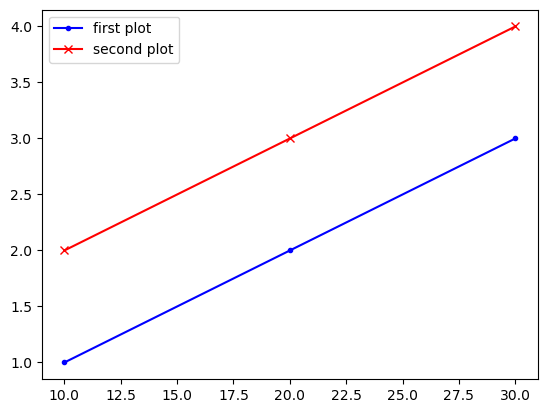

In [85]:
plot([10,20,30],[1,2,3],"b.-",label="first plot")
plot([10,20,30],[2,3,4],"rx-",label="second plot")
legend()
savefig("my_figure.png")

# Dates

* Julia has a structure called `DateTime` to represent a date and time.

In [86]:
using Dates
lastsecond = DateTime(1999,12,31,23,59,59)

1999-12-31T23:59:59

* The difference between two `DateTime`s returns a structure representing the number of milliseconds.

In [87]:
DateTime(2001,1,1)

2001-01-01T00:00:00

In [88]:
DateTime(2001,1,1) - DateTime(2000,1,1)

31622400000 milliseconds

* Convert this in days:

In [89]:

Dates.Day(DateTime(2001,1,1) - DateTime(2000,1,1))

366 days

* add a duration to a date

In [90]:
DateTime(2000,1,1) + Dates.Day(366)

2001-01-01T00:00:00

In how many days is your next birthday?

## Loops

* Let your computer do repetitive tasks!
* Loops have a counter which takes successively all elements of a row vector

In [96]:
for i = [1 2 10 20]
    @show i
end

i = 1
i = 2
i = 10
i = 20


* Loops are often used with a range of values

In [97]:
for i = 1:5
  @show i
end

i = 1
i = 2
i = 3
i = 4
i = 5


* Explicit loops can sometimes be avoided:
* For example, sum all integer from 1 to 10

In [98]:
function sumupto(N)
   total = 0;
   for i = 1:N
        total = total + i;
        @show i,total
   end
    @show total
    return total
end
S = sumupto(10)

(i, total) = (1, 1)
(i, total) = (2, 3)
(i, total) = (3, 6)
(i, total) = (4, 10)
(i, total) = (5, 15)
(i, total) = (6, 21)
(i, total) = (7, 28)
(i, total) = (8, 36)
(i, total) = (9, 45)
(i, total) = (10, 55)
total = 55


55

In [99]:
length(findall(P .== 0))

5

Can simply be computed as `sum(1:10)`.

# if-statement

* Sometimes your code needs to behave differently depending on some conditions.

* if-statement has the following structure.

```julia
if some_conditions
  # do something
else
  # do something else
end
```
The else section can be omitted.

For example.

```julia
if x < 0
   x = -x;
end
```

* Which Julia function implements the last code example?